In [4]:
!pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 11.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 12.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:0000:0100:01


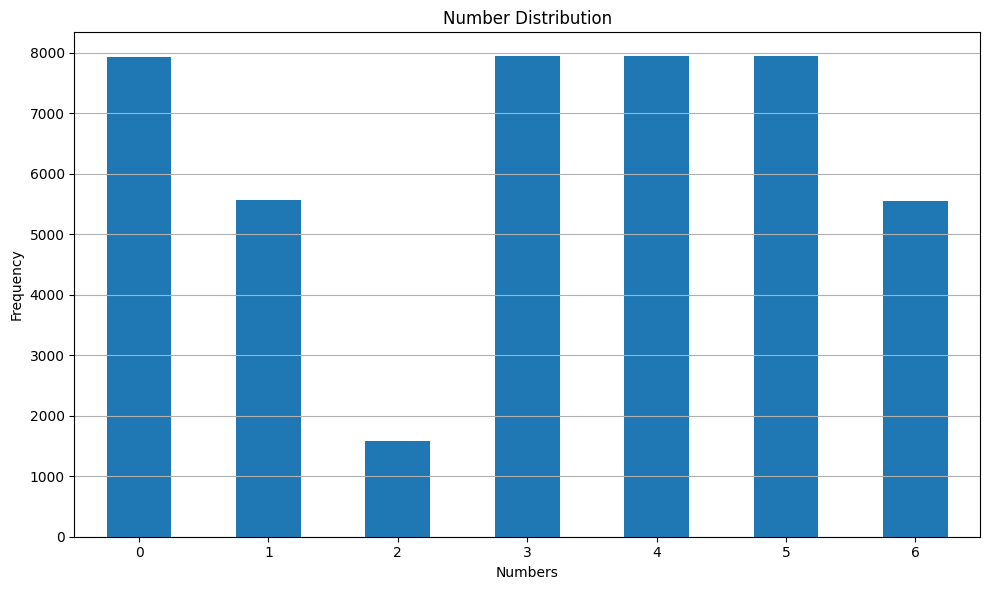

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv_and_plot_distribution(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, header=None)  # Assuming no header in the CSV

    # Flatten the DataFrame to a single series
    numbers = df.values.flatten()

    # Create a Series from the numbers, dropping any NaN values
    numbers_series = pd.Series(numbers).dropna().astype(int)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    numbers_series.value_counts().sort_index().plot(kind='bar')
    
    # Adding labels and title
    plt.title('Number Distribution')
    plt.xlabel('Numbers')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

def main():
    filename = '/tmp/piecegen.csv'  # Replace with your CSV file name
    read_csv_and_plot_distribution(filename)

if __name__ == "__main__":
    main()
